<center><b><h1>Startup Dashboard Analysis</h1></b></center>

In [88]:
import numpy as np
import pandas as pd

In [89]:
startup_data = pd.read_csv('startup_funding.csv')

startup_data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [90]:
# All Startup name in the list
sorted(startup_data['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [91]:
# checking missing values in Investors Name

startup_data['Investors Name'].isnull().sum()

np.int64(24)

In [92]:
# Filling the missing value of Investors Name with the undisclosed 

startup_data['Investors Name'].fillna('Undisclosed', inplace=True)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7960\792304345.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  startup_data['Investors Name'].fillna('Undisclosed', inplace=True)


In [93]:
# All Investors Name in the list

sorted(startup_data['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

<center><b><h2>Part 2 - Exploratory Data Analysis</h2></b></center>

<h4>Data preprocessing in Indian Startup Dataset: </h4>
<ol>
	<li>Drop remarks col</li>
	<li>Set index sno</li>
	<li>Rename col</li>
	<li>convert amount to Cr Rs</li>
	<li>Date col</li>
	<li>Dropna</li>
	

<b>Investor name data cleaning as Investor name column in our dataset contains multiple investors name separated by comma. We will split the names and create a new row for each investor name.</b>

In [94]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


<p>1- As we can see in the dataset, Remarks column contains so many Null values, so we will drop this column.</p>
<p>2- As we can see Date column is in object type, so we will convert it into datetime type.</p>

<h4><b><center>🚀 1- Remarks column drop

In [95]:
startup_data.drop(columns=['Remarks'], inplace= True)

startup_data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


<h4><center><b>🚀 2- Setting Index of the data to the Sr No column

In [96]:
startup_data.set_index('Sr No', inplace = True)

In [97]:
startup_data.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


<h4><center><b>🚀 3- Renaming the columns

In [98]:
startup_data.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'City  Location' : 'city',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)

In [99]:
startup_data.head()

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


<h4><center><b>🚀 4- Converting the Amount column to Cr Rs

In [100]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   city               2864 non-null   object
 5   Investors Name     3044 non-null   object
 6   round              3040 non-null   object
 7   amount             2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


> first converting the data into float but for that we are gonna fill the missing values of the amount with the 0 (here 0 means undisclosed amount) 

In [101]:
startup_data["amount"] = startup_data["amount"].astype(str) 

In [102]:
startup_data['amount'].fillna('0', inplace = True)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7960\4063517074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  startup_data['amount'].fillna('0', inplace = True)


> As we can see in the dataset, the amount column contains amount in string and have commas in it. So, we will remove the commas and convert the amount into float type.

In [103]:
startup_data['amount'] = startup_data['amount'].str.replace(',', '')

> We still cannot convert the amount column into float type because it contains some values like `undisclosed` and `unknown` which is not a valid float value. So, we will replace these values with 0.

In [104]:
startup_data['amount'] = startup_data['amount'].str.replace('undisclosed', '0')

startup_data['amount'] = startup_data['amount'].str.replace('Undisclosed', '0')

startup_data['amount'] = startup_data['amount'].str.replace('unknown', '0')

startup_data["amount"] = startup_data["amount"].str.replace(r"[^\d]", "", regex=True)  # Remove non-numeric characters


> We still cannot convert the amount column into float type because it contains some values like `14342000+` which is not a valid float value. So, we will remove the `+` sign from the values.

In [105]:
startup_data["amount"] = startup_data["amount"].str.replace("+", "", regex=False)


> As we Removed the non-numeric characters from the amount column, now data in those row is empty string like this '' which is not a valid float value. So, we will replace these values with 0.

In [106]:
startup_data['amount'] = startup_data['amount'].replace('', '0')

<b> Finally converting the data into the float type.

In [107]:
startup_data['amount'] = startup_data['amount'].astype('float')

In [108]:
print(startup_data['amount'].dtype)  
print(startup_data['amount'].isna().sum()) 

float64
0


<center><b> Converting the amount into Cr Rs

In [109]:
import requests

# Get the USD to INR exchange rate
def get_usd_to_inr_rate():
    try:
        # Using a simple, reliable API
        response = requests.get("https://open.er-api.com/v6/latest/USD")
        data = response.json()
        return data['rates']['INR']
    except:
        # If API fails, use a backup rate
        print("Couldn't get live rate, using backup rate")
        return 85.0


# Get the current exchange rate
usd_inr_rate = get_usd_to_inr_rate()
print(f"USD to INR rate: {usd_inr_rate}")

# Convert USD to INR Crores
# 1 Crore = 10,000,000 INR
startup_data['amount'] = startup_data['amount'] * usd_inr_rate / 1e7



USD to INR rate: 85.584563


In [110]:
startup_data.head()

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.123501
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.675369
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.405221


<h4><center><b>🚀 5- Date column 

> Converting the data into the datetime type.

In [111]:
startup_data['date'] = startup_data['date'].str.replace('05/072018','05/07/2018')


In [112]:
# Convert dates while handling any errors
startup_data['date'] = pd.to_datetime(startup_data['date'], dayfirst=True, errors='coerce')

In [113]:
print(startup_data['date'].dtype)  
print(startup_data['date'].isna().sum()) 

datetime64[ns]
7


In [114]:
startup_data['date'].dt.month

Sr No
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
3040    1.0
3041    1.0
3042    1.0
3043    1.0
3044    1.0
Name: date, Length: 3044, dtype: float64

In [115]:
startup_data['date'].dt.year

Sr No
1       2020.0
2       2020.0
3       2020.0
4       2020.0
5       2020.0
         ...  
3040    2015.0
3041    2015.0
3042    2015.0
3043    2015.0
3044    2015.0
Name: date, Length: 3044, dtype: float64

In [116]:
startup_data.head()

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.123501
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.675369
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.405221


<h4><center><b>🚀 6- Dropna

In [117]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3037 non-null   datetime64[ns]
 1   Startup Name       3044 non-null   object        
 2   Industry Vertical  2873 non-null   object        
 3   SubVertical        2108 non-null   object        
 4   city               2864 non-null   object        
 5   Investors Name     3044 non-null   object        
 6   round              3040 non-null   object        
 7   amount             3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [118]:
startup_data.dropna(subset=['date','Startup Name','Industry Vertical', 'city', 'Investors Name', 'round', 'amount'], inplace= True)

In [119]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2855 non-null   datetime64[ns]
 1   Startup Name       2855 non-null   object        
 2   Industry Vertical  2855 non-null   object        
 3   SubVertical        2098 non-null   object        
 4   city               2855 non-null   object        
 5   Investors Name     2855 non-null   object        
 6   round              2855 non-null   object        
 7   amount             2855 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 200.7+ KB


<h4><center><b> 🚀 6- Investor name data cleaning

In [120]:
# last time ham aise code kare the jisme problem yee hai ke list me multiple investors ka naam ek sath aarha hai

sorted(startup_data['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [121]:
# ab hrr investor ke naam ko individually dikahne ke liye following code likehenge

print(len(set(startup_data['Investors Name'].str.strip().str.split(',').explode().str.strip())))

# Replace the escape sequence for non-breaking space
startup_data['Investors Name'] = startup_data['Investors Name'].str.replace('\\\\xc2\\\\xa0', ' ', regex=False)

# Optionally, replace double spaces with a single space and strip extra whitespace.
startup_data['Investors Name'] = startup_data['Investors Name'].str.replace('  ', ' ', regex=False)
startup_data['Investors Name'] = startup_data['Investors Name'].str.strip()

# Replace the encoded sequences with the desired characters
startup_data['Investors Name'] = startup_data['Investors Name'].str.replace('\\\\xe2\\\\x80\\\\x99s', "'s", regex=False)
startup_data['Investors Name'] = startup_data['Investors Name'].str.replace('\\\\xe2\\\\x80\\\\x99', "'", regex=False)

# Optionally, remove any extra whitespace
startup_data['Investors Name'] = startup_data['Investors Name'].str.replace('  ', ' ', regex=False).str.strip()


sorted(set(startup_data['Investors Name'].str.strip().str.split(',').explode().str.strip()))




3142


['',
 '"Kedaraa Capital',
 '& Others',
 '& other Angel investors.',
 '021 Capita',
 '100 Co-founders Lab and others.',
 '122 West Ventures',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3ONE4 Capital Advisors',
 '3One4 Capital',
 '3one4 Capital',
 '3one4 Capital Advisors LLP',
 '3one4 capital',
 '500 Start-Ups',
 '500 Startups',
 '500 Startups & Other HNIs',
 '50K Ventures',
 '50K Ventures & others',
 '50k Ventures',
 '91SpringBoard',
 '91maker.com',
 '91springboard',
 'A M Sikander',
 'A91 Partners',
 'AB Kinnevik',
 'ABB Technology Ventures',
 'ABCOM Investments',
 'ABI-Showatech (India) Ltd',
 'ABM Knowledgeware',
 'ADAG Reliance Private Equity',
 'AECAL',
 'AET Fund',
 'AJ Ventures and Jain International Trade Organisation (JITO)',
 'AL Nour International Holdings and Mark V Investments',
 'ANI Technologies Pvt. Ltd',
 'APIS Partners',
 'ASK Pravi',
 'ASP Consulting',
 'AV Thomas Group',
 'AVG G

---
<b> Now exporting the clean data</b>  

---

In [122]:
startup_data.to_csv('startup_funding_clean_data.csv')

---

<b><h5> As we can see many investors names are repeated in the dataset with little bit spelling change, so manually replacing the names with the correct names is one option, second option is to use NLP or ML model to detect similar names and replace them with the correct names. But for now we will manually replace the names.</h5></b>

<h2><center>🚀 Exploratory Data Analysis used in the Website

<h3>🚀 1- Investor downdown Data Analysis</h3>

1. Investor POV  
* Name  
* Recent Investments  
* Biggest investments  
* Generally invests in ...  
* sector \-\>pie  
* stage \-\>pie  
* city \-\> pie  
* YoY investment graph  
* Similar Investors  


---  
<ul>
<li> 1- Name dropdown se leenge</li>
<li> 2- Recent Investments - Amount, Date, Startup Name</li>
<li> 3- Biggest Investments - Amount, Date, Startup Name</li>


In [123]:
# 2- recent investment code

startup_data[startup_data['Investors Name'].str.contains('500 Startups')].iloc[:5][['date','Startup Name','Industry Vertical','city','round','amount' ]]

,date,Startup Name,Industry Vertical,city,round,amount
Sr No,,,,,,
566,2017-10-25,SpotDraft,Consumer Internet,Gurgaon,Seed Funding,4.707151
694,2017-07-12,Bottr.me,Technology,Bangalore,Seed Funding,0.000000
727,2017-06-06,Ftcash,Consumer Internet,Mumbai,Private Equity,0.000000
909,2017-04-24,Niramai,Healthcare,Bangalore,Seed Funding,0.000000
1519,2016-07-07,Quickli,Logistics,Gurgaon,Private Equity,0.000000


In [124]:
startup_data.head(3)

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.123501


In [125]:
# 3- Biggest Investment by the investor

startup_data[startup_data['Investors Name'].str.contains('500 Startups')].groupby(by= 'Startup Name')['amount'].sum().sort_values(ascending=False)

Startup Name
Kartrocket                  51.350738
POPxo.com                   17.116913
HeadOut                     15.405221
Springboard                 14.549376
ORIGA Leasing                9.414302
EduKart                      8.558456
Sheroes                      6.590011
OnlineTyari                  6.590011
SpotDraft                    4.707151
Capabiliti                   3.423383
LafaLafa                     1.069807
Ftcash                       0.000000
Bottr.me                     0.000000
Reddoorz                     0.000000
Quickli                      0.000000
Niramai                      0.000000
StalkBuyLove                 0.000000
SwitchMe                     0.000000
TransTutors / AskIITians     0.000000
Tripoto                      0.000000
Wishup                       0.000000
Name: amount, dtype: float64

In [126]:
startup_data.head(3)

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.123501


<Axes: ylabel='count'>

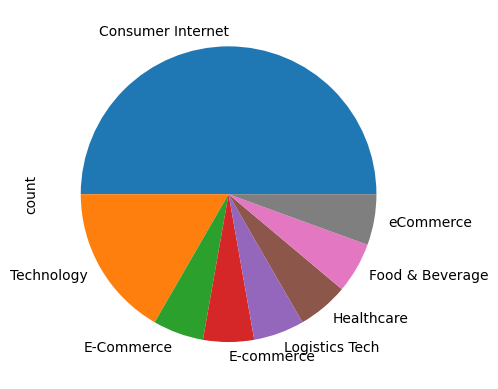

In [127]:
# Generally invests in ...  
#   * sector ->pie  
#   * stage ->pie  
#   * city -> pie

# Stage:
startup_data[startup_data['Investors Name'].str.contains('Sequoia Capital India')]['Industry Vertical'].value_counts().plot(kind = 'pie')

<Axes: ylabel='amount'>

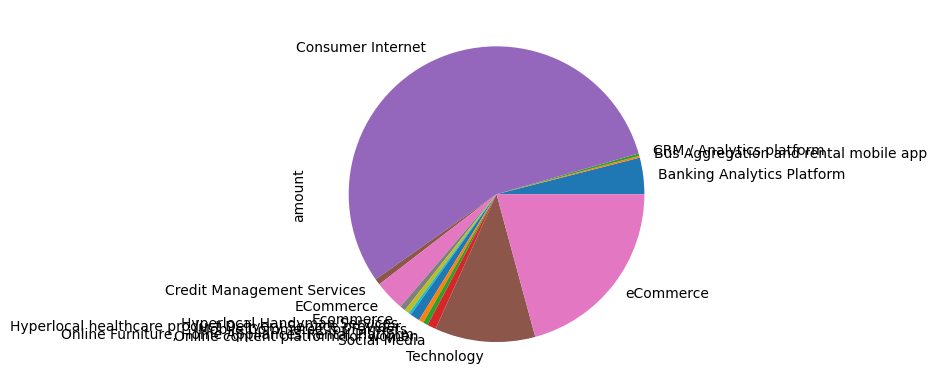

In [128]:
startup_data[startup_data['Investors Name'].str.contains('IDG Ventures')].groupby('Industry Vertical')['amount'].sum().plot(kind = 'pie')

<Axes: ylabel='amount'>

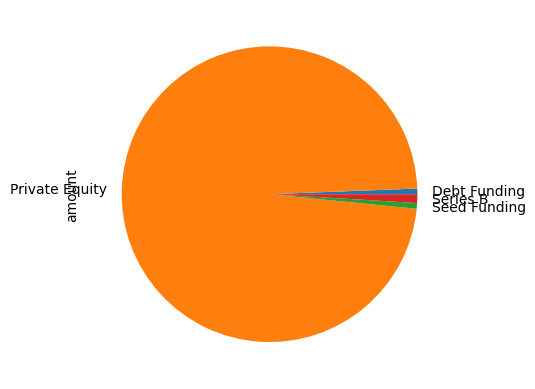

In [129]:
# Sector
startup_data[startup_data['Investors Name'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind = 'pie')

<Axes: ylabel='amount'>

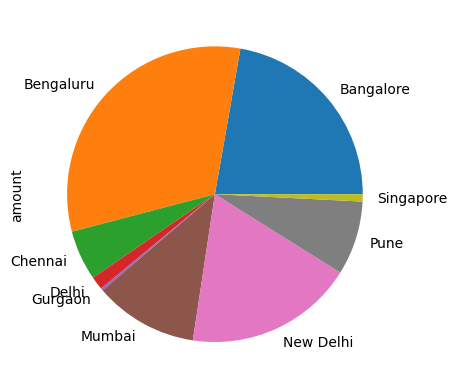

In [130]:
# City

startup_data[startup_data['Investors Name'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().plot(kind = 'pie')

In [131]:
startup_data.head(2)

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828


In [132]:
# YoY investment group

startup_data['year'] = startup_data["date"].dt.year

In [133]:
startup_data.head(3)

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount,year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.123501,2020


<Axes: xlabel='year'>

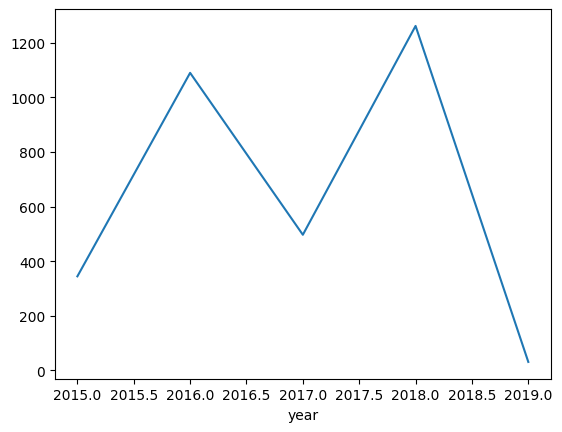

In [134]:
startup_data[startup_data['Investors Name'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

One common way to display “similar investors” is to compare their investment profiles. For example, you can assume that an investor’s “profile” is defined by the industries (or sectors) they invest in. Then you can calculate a distribution (or frequency) of investments per industry for each investor and use a similarity measure (like cosine similarity) to see which investors have the most similar distribution to the selected one.

Below is an example approach using pandas and scikit‐learn’s cosine similarity. In this example, we:

1. Explode the “Investors Name” column (if it contains multiple investors per row) so that each investor appears individually.
2. Create a cross-tab (pivot) of the count of investments per “Industry Vertical” for each investor.
3. Normalize that pivot table so that each investor has a distribution (sums to 1).
4. Compute cosine similarity between the selected investor’s distribution and every other investor’s.
5. Return the top similar investors.

You can integrate this into your Streamlit app to display similar investors.

---

### **Example Code to Compute Similar Investors:**

```python
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_investors(selected_investor, matches, top_n=5):
    # Make a copy of the matches DataFrame
    df = matches.copy()
    
    # Explode the 'Investors Name' column (assuming they are comma separated)
    df['Investor'] = df['Investors Name'].str.split(',')
    df = df.explode('Investor')
    df['Investor'] = df['Investor'].str.strip()  # remove any extra spaces
    
    # Create a pivot table: rows are investors and columns are Industry Vertical.
    # The values are the count of investments in that vertical.
    pivot = pd.crosstab(df['Investor'], df['Industry Vertical'])
    
    # Normalize each investor's row to sum to 1 (i.e. get a distribution).
    norm_pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # Check if the selected investor exists in our data.
    if selected_investor not in norm_pivot.index:
        return f"Investor '{selected_investor}' not found."
    
    # Get the distribution vector for the selected investor.
    selected_vec = norm_pivot.loc[[selected_investor]]  # Keep it as a DataFrame
    
    # Compute cosine similarity between the selected investor and all investors.
    sim = cosine_similarity(norm_pivot, selected_vec).flatten()
    
    # Create a Series for similarities with investor names as index.
    sim_series = pd.Series(sim, index=norm_pivot.index)
    
    # Remove the selected investor from the list (similarity with itself).
    sim_series = sim_series.drop(selected_investor)
    
    # Get the top_n similar investors.
    top_similar = sim_series.sort_values(ascending=False).head(top_n)
    
    return top_similar.to_dict()

# Example usage:
selected_investor = "Sequoia Capital India"  # change as needed
similar_investors = get_similar_investors(selected_investor, matches, top_n=5)
print("Similar Investors:")
print(similar_investors)
```

---

### **Explanation:**

- **Exploding Investors:**  
  The code splits the “Investors Name” field by commas and uses `explode()` so that each investor is on its own row. This ensures we count each investor separately.

- **Pivot Table:**  
  `pd.crosstab(df['Investor'], df['Industry Vertical'])` creates a table where each row represents an investor and each column represents an industry vertical. The cell values are counts of how many times that investor invested in that vertical.

- **Normalization:**  
  Dividing each row by its sum gives you the distribution of investments across industries for that investor.

- **Cosine Similarity:**  
  Cosine similarity is then computed between the distribution vector of the selected investor and every other investor. Investors with a higher cosine similarity have more similar investment patterns.

- **Returning Results:**  
  The function returns the top _n_ investors (excluding the selected one) in a dictionary format.

---

### **Integration into Your App:**

You can call `get_similar_investors(selected_investor, matches)` in your Streamlit app (for example, when an investor is selected) and display the results using `st.write()` or `st.json()`. This provides a way to show “similar investors” based on their investment profiles.

This approach is just one method—you might also consider other features (like investment amounts, rounds, cities, etc.) to define similarity if that better suits your needs.

In [135]:
startup_data.head(2)

,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,round,amount,year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.691260,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.881828,2020


In [136]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_investors(selected_investor, startup_data, top_n=5):
    # Make a copy of the matches DataFrame
    df = startup_data.copy()
        
    # Create a pivot table: rows are investors and columns are Industry Vertical.
    # The values are the count of investments in that vertical.
    pivot = pd.crosstab(df['Investors Name'], df['Industry Vertical'])
    
    # Normalize each investor's row to sum to 1 (i.e. get a distribution).
    norm_pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # Get the distribution vector for the selected investor.
    selected_vec = norm_pivot.loc[[selected_investor]]  # Keep it as a DataFrame
    
    # Compute cosine similarity between the selected investor and all investors.
    sim = cosine_similarity(norm_pivot, selected_vec).flatten()
    
    # Create a Series for similarities with investor names as index.
    sim_series = pd.Series(sim, index=norm_pivot.index)
    
    # Remove the selected investor from the list (similarity with itself).
    sim_series = sim_series.drop(selected_investor)
    
    # Get the top_n similar investors.
    top_similar = sim_series.sort_values(ascending=False).head(top_n)
    
    return top_similar.to_dict()

# Example usage:
selected_investor = "Sequoia Capital India"  # change as needed
similar_investors = get_similar_investors(selected_investor, startup_data, top_n=5)
print("Similar Investors:")
print(similar_investors)

Similar Investors:
{'1Crowd (through crowdfunding)': 0.5773502691896257, '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.': 0.5773502691896257, 'mall Industries Development Bank of India (SIDBI)': 0.5773502691896257, 'lockchain ecosystem Global Advisors, Horseferry': 0.5773502691896257, '3 undisclosed investors': 0.5773502691896257}


### <center> 3. General Analysis </center>

- **MoM chart**  
  - Total + Count

- **Cards**  
  - Total + Max + Avg  
  - Total funded startups

- **Sector Analysis Pie**  
  - Top sectors (Count + Sum)

- **Type of funding**

- **City wise funding**

- **Top Startups**  
  - Year wise  
  - Overall

- **Top investors**

- **Funding Heatmap**


In [137]:
# Total money Investment in the Indian Startup

round(startup_data['amount'].sum(), 4)

np.float64(396911.5273)

In [138]:
# Max money invested in a company

startup_data.groupby('Startup Name')['amount'].max().sort_values(ascending= False).head().values[0]

np.float64(33377.97957)

In [139]:
# Average investment amount

startup_data.groupby('Startup Name')['amount'].sum().mean()

np.float64(170.714635402855)

In [140]:
# Total Funded startup

startup_data['Startup Name'].nunique()

2325

In [141]:
# Month of Month chart

startup_data['month'] = startup_data['date'].dt.month

In [142]:
# Number of Funding
temp_df = startup_data.groupby(['year', 'month'])['Startup Name'].count().reset_index()

In [147]:
temp_df.head()

,year,month,Startup Name,x-axis
0,2015,4,62,4-2015
1,2015,5,55,5-2015
2,2015,6,85,6-2015
3,2015,7,95,7-2015
4,2015,8,98,8-2015


In [143]:
temp_df['x-axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [148]:
temp_df.head()

,year,month,Startup Name,x-axis
0,2015,4,62,4-2015
1,2015,5,55,5-2015
2,2015,6,85,6-2015
3,2015,7,95,7-2015
4,2015,8,98,8-2015


In [145]:
# Total amount of funding

startup_data.groupby(['year', 'month'])['amount'].sum().reset_index()

,year,month,amount
0,2015,4,8391.566402
1,2015,5,2739.861408
2,2015,6,4467.462838
3,2015,7,83876.526886
4,2015,8,9104.622747
5,2015,9,12585.381158
6,2015,10,2182.072577
7,2015,11,7696.405789
8,2015,12,2617.629535
9,2016,1,5989.892395
